<a href="https://colab.research.google.com/github/Kanonskud/Data-Exam/blob/main/EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install selenium

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver



In [2]:
pip install yfinance

     |████████████████████████████████| 5.5MB 17.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=f35148220eea8d347ac028c044a3d5c90dd7d39a5728bf246c419138ff5a5d83
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
pip install git+https://github.com/quantopian/pyfolio


  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-qmgl9lrl
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-qmgl9lrl
     |████████████████████████████████| 61kB 9.2MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=8a433f32b8b0d65b95164ba313a3293299662a85ff2cc3153dc3877177410f09
  Stored in directory: /tmp/pip-ephem-wheel-cache-asbkb316/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
  Created wheel for empyrical: filename=empyrical-0.5.5-cp36-none-any.whl size=39765 sha256=df208f87f40a42beba05f0eca7e5ed3dfb60e54a2bbdce1466a2ff34706b5b87
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


In [4]:
pip install backtrader

     |████████████████████████████████| 419kB 18.2MB/s 


In [5]:

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import random
import pandas as pd
from pandas_datareader import data as pdr 
#import pandas as pdr
#%matplotlib inline
from scipy import stats
from scipy.stats import norm, t
from matplotlib import style
import bs4 as bs
import requests
import datetime
import pyfolio as pf
import pytz
from os import listdir

# Import warnings and add a filter to ignore them
import warnings
warnings.simplefilter('ignore')
# Import XGBoost
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sn
from backtrader.feeds import PandasData

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# Defining and initializing the scraper for Investing.com

In [ ]:
from selenium import webdriver
from time import sleep
import errno    
import os
import os.path
import datetime
import sys
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from functools import reduce

xpath_nextpage = '//div[@id="paginationWrap"]//div[last()]/a'
xpath_msg = '//div[contains(@class,"mainComment")]//div[contains(@class,"commentText")]//span[@class="js-text"]'
xpath_date = '//div[contains(@class,"mainComment")]//div[contains(@class,"commentBody")]//span[@class="js-date"]'

comments_list = []

def build_chrome_options():
    chrome_options = webdriver.ChromeOptions()
    chrome_options.accept_untrusted_certs = True
    chrome_options.assume_untrusted_cert_issuer = True
    # chrome configuration
    # More: https://github.com/SeleniumHQ/docker-selenium/issues/89
    # And: https://github.com/SeleniumHQ/docker-selenium/issues/87
    chrome_options.add_argument("incognito")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--window-size=1024,800")
    chrome_options.add_argument("disable-extensions")
    chrome_options.add_argument("--start-maximized")
    chrome_options.add_argument("--test-type=browser")
    chrome_options.add_argument("--disable-impl-side-painting")
    chrome_options.add_argument("--disable-setuid-sandbox")
    chrome_options.add_argument("--disable-seccomp-filter-sandbox")
    chrome_options.add_argument("--disable-breakpad")
    chrome_options.add_argument("--disable-client-side-phishing-detection")
    chrome_options.add_argument("--disable-cast")
    chrome_options.add_argument("--disable-cast-streaming-hw-encoding")
    chrome_options.add_argument("--disable-cloud-import")
    chrome_options.add_argument("--disable-popup-blocking")
    chrome_options.add_argument("--ignore-certificate-errors")
    chrome_options.add_argument("--disable-session-crashed-bubble")
    chrome_options.add_argument("--disable-ipv6")
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--allow-http-screen-capture")
    return chrome_options 

def init():
    global driver
    driver = webdriver.Chrome('chromedriver', options=build_chrome_options())

def connect(page):
    driver.get('https://www.investing.com/equities/tweed-marijuana-inc-commentary/' + str(page))

def scrap():
    msgs = driver.find_elements_by_xpath(xpath_msg)
    dates = driver.find_elements_by_xpath(xpath_date)
    
    try:
        for i in range(len(msgs)):
            soup = BeautifulSoup(msgs[i].text, 'html.parser').decode("utf-8")
            time = dates[i].text
            
            comment_dict = {
                "date": time,
                "comment": soup
            }
            
            print(comment_dict)
            
            comments_list.append(comment_dict)

    finally:
        print("done scraping")


def main(argv):
    #angiv aktier man vil scrape i listen
    init()
    max_pages = 49

    page = 1
    while page < max_pages:
        connect(page)
        sleep(3)
        scrap()
        print("success")
        page += 1

    df = pd.DataFrame(comments_list)
    df.to_csv('test.csv')
    comments_list.clear()


if __name__ == "__main__":
    main(sys.argv)

In [ ]:

df = pd.read_csv('test.csv')

# An overview of the data scraped

In [ ]:
df

,Unnamed: 0,date,comment
0,0,"Jan 21, 2021 3:24PM ET",A break of $34 opens a bull run to $40!!!!!\n
1,1,"Jan 20, 2021 8:30PM ET","Sell CGC, Buy PLNHF\n"
2,2,"Jan 14, 2021 6:50PM ET",They're building the empire!!! ...... See belo...
3,3,"Jan 14, 2021 6:49PM ET",https://www.prnewswire.com/news-releases/canop...
4,4,"Jan 14, 2021 10:21AM ET",Nice to add here for a brake of $34.. Target $...
...,...,...,...
1149,1149,"Jan 31, 2017 3:37PM ET",My sl can now be called ***control\n
1150,1150,"Dec 01, 2016 8:28AM ET",Canopy Growth enters into agreement to acquire...
1151,1151,"Apr 03, 2016 1:56PM ET",GramCapital.com\n
1152,1152,"Oct 21, 2015 10:49AM ET",I see a bright future for this one. 5 billion ...


In [ ]:
pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [ ]:
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.MENTION, p.OPT.HASHTAG)

In [ ]:
data_try = pd.DataFrame ([p.clean(comment) for comment in df['comment'][:20]], columns = ['clean'])

In [ ]:
data_try['no clean'] = df ['comment'][:20]

In [ ]:
data_try


,clean,no clean
0,A break of $34 opens a bull run to $40!!!!!,A break of $34 opens a bull run to $40!!!!!\n
1,"Sell CGC, Buy PLNHF","Sell CGC, Buy PLNHF\n"
2,They're building the empire!!! ...... See below.,They're building the empire!!! ...... See belo...
3,,https://www.prnewswire.com/news-releases/canop...
4,Nice to add here for a brake of $34.. Target $40.,Nice to add here for a brake of $34.. Target $...
5,Flag on chart. Should break up very soon. Uppe...,Flag on chart. Should break up very soon. Uppe...
6,Hello cannabis hype 2.0 my old friend..,Hello cannabis hype 2.0 my old friend..\n
7,Up up up 100 by next summer,Up up up 100 by next summer\n
8,Serious FOMO starting,Serious FOMO starting\n
9,Call options for $40 strike just astronomical....,Call options for $40 strike just astronomical....


In [ ]:
data_try = pd.DataFrame ([p.clean(comment) for comment in df['comment'][:1000]], columns = ['clean'])

In [ ]:
df=pd.DataFrame(df[:1000])

# Adding the cleaned comments 

In [ ]:
df['comment_clean'] = [p.clean(comment) for comment in df['comment']]

In [ ]:
df

,Unnamed: 0,date,comment,comment_clean
0,0,"Jan 21, 2021 3:24PM ET",A break of $34 opens a bull run to $40!!!!!\n,A break of $34 opens a bull run to $40!!!!!
1,1,"Jan 20, 2021 8:30PM ET","Sell CGC, Buy PLNHF\n","Sell CGC, Buy PLNHF"
2,2,"Jan 14, 2021 6:50PM ET",They're building the empire!!! ...... See belo...,They're building the empire!!! ...... See below.
3,3,"Jan 14, 2021 6:49PM ET",https://www.prnewswire.com/news-releases/canop...,
4,4,"Jan 14, 2021 10:21AM ET",Nice to add here for a brake of $34.. Target $...,Nice to add here for a brake of $34.. Target $40.
...,...,...,...,...
995,995,"Oct 08, 2018 2:51PM ET",Past four weeks have been on a slow down behav...,Past four weeks have been on a slow down behav...
996,996,"Oct 08, 2018 8:32AM ET",Investing.com puts the price at $53 to $54 / s...,Investing.com puts the price at $53 to $54 / s...
997,997,"Oct 05, 2018 9:20AM ET",hey what are you guys thought in cgc?\n,hey what are you guys thought in cgc?
998,998,"Oct 03, 2018 2:47AM ET",what's the prediction on this on on Oct 17. do...,what's the prediction on this on on Oct 17. do...


# Tokenization

In [ ]:
from string import punctuation

In [ ]:
import spacy
nlp = spacy.load("en")

In [ ]:
cleanup_elements = list(set(punctuation))
cleanup_elements.append("RT")

In [ ]:
for ele in cleanup_elements:
    df["comment_clean"] = [comment.replace(ele, "") for comment in df["comment_clean"]]

In [ ]:
df['comment_nlp'] = [nlp(comment) for comment in df['comment_clean']]

In [ ]:
df.head()

,Unnamed: 0,date,comment,comment_clean,comment_nlp
0,0,"Jan 21, 2021 3:24PM ET",A break of $34 opens a bull run to $40!!!!!\n,A break of 34 opens a bull run to 40,"(A, break, of, 34, opens, a, bull, run, to, 40)"
1,1,"Jan 20, 2021 8:30PM ET","Sell CGC, Buy PLNHF\n",Sell CGC Buy PLNHF,"(Sell, CGC, Buy, PLNHF)"
2,2,"Jan 14, 2021 6:50PM ET",They're building the empire!!! ...... See belo...,Theyre building the empire See below,"(They, re, building, the, empire, , See, below)"
3,3,"Jan 14, 2021 6:49PM ET",https://www.prnewswire.com/news-releases/canop...,,()
4,4,"Jan 14, 2021 10:21AM ET",Nice to add here for a brake of $34.. Target $...,Nice to add here for a brake of 34 Target 40,"(Nice, to, add, here, for, a, brake, of, 34, T..."


In [ ]:
tokens = []

for comment in nlp.pipe(df['comment_clean']):
  comment_tok = [token.lemma_.lower() for token in comment if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV', 'VERB'] and not token.is_stop] 
  tokens.append(comment_tok)

In [ ]:
df['tokens'] = tokens

In [ ]:
df["token_string"] = df["tokens"].map(lambda row: " ".join(row))

In [ ]:
df.head(100)

,Unnamed: 0,date,comment,comment_clean,comment_nlp,tokens,token_string
0,0,"Jan 21, 2021 3:24PM ET",A break of $34 opens a bull run to $40!!!!!\n,A break of 34 opens a bull run to 40,"(A, break, of, 34, opens, a, bull, run, to, 40)","[break, open, bull, run]",break open bull run
1,1,"Jan 20, 2021 8:30PM ET","Sell CGC, Buy PLNHF\n",Sell CGC Buy PLNHF,"(Sell, CGC, Buy, PLNHF)","[sell, cgc, buy, plnhf]",sell cgc buy plnhf
2,2,"Jan 14, 2021 6:50PM ET",They're building the empire!!! ...... See belo...,Theyre building the empire See below,"(They, re, building, the, empire, , See, below)","[build, empire]",build empire
3,3,"Jan 14, 2021 6:49PM ET",https://www.prnewswire.com/news-releases/canop...,,(),[],
4,4,"Jan 14, 2021 10:21AM ET",Nice to add here for a brake of $34.. Target $...,Nice to add here for a brake of 34 Target 40,"(Nice, to, add, here, for, a, brake, of, 34, T...","[nice, add, brake, target]",nice add brake target
...,...,...,...,...,...,...,...
95,95,"May 29, 2020 3:15PM ET",give this puppy a few days to cool off. if it ...,give this puppy a few days to cool off if it h...,"(give, this, puppy, a, few, days, to, cool, of...","[puppy, day, cool, hold]",puppy day cool hold
96,96,"May 29, 2020 2:58PM ET",HASNT BEEN A MONDAY were i DIDNT make money of...,HASNT BEEN A MONDAY were i DIDNT make money of...,"(HASNT, BEEN, A, MONDAY, were, i, DIDNT, make,...","[hasnt, monday, didnt, money, stock, lol, buying]",hasnt monday didnt money stock lol buying
97,97,"May 29, 2020 12:13PM ET",nowhere but up to go from here\n,nowhere but up to go from here,"(nowhere, but, up, to, go, from, here)",[],
98,98,"May 29, 2020 11:04AM ET",Dropping to ~20 support? Might be likely.\n,Dropping to 20 support Might be likely,"(Dropping, to, 20, support, Might, be, likely)","[drop, support, likely]",drop support likely


# Importing Vader and adding labels

In [ ]:
pip install -qq -U gensim

     |████████████████████████████████| 24.2MB 1.7MB/s 


In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.lsimodel import LsiModel
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()
def get_compound_score(token_string):
    ss = sid.polarity_scores(str(token_string))
    return ss['compound']

def get_sentiment(compound_score):
    if compound_score > 0:
        return 1
    else:
        return 0


def vader(df):
    for token in df.token_string:
        ss = sid.polarity_scores(token)
    
    df['compound_score'] = df['token_string'].apply(lambda x: get_compound_score(x))
    df['LABEL'] = df['compound_score'].apply(lambda x: get_sentiment(x))
    
    return df

In [ ]:
df_test=vader(df)

In [ ]:
df_test

,Unnamed: 0,date,comment,comment_clean,comment_nlp,tokens,token_string,compound_score,LABEL
0,0,"Jan 21, 2021 3:24PM ET",A break of $34 opens a bull run to $40!!!!!\n,A break of 34 opens a bull run to 40,"(A, break, of, 34, opens, a, bull, run, to, 40)","[break, open, bull, run]",break open bull run,0.0000,0
1,1,"Jan 20, 2021 8:30PM ET","Sell CGC, Buy PLNHF\n",Sell CGC Buy PLNHF,"(Sell, CGC, Buy, PLNHF)","[sell, cgc, buy, plnhf]",sell cgc buy plnhf,0.0000,0
2,2,"Jan 14, 2021 6:50PM ET",They're building the empire!!! ...... See belo...,Theyre building the empire See below,"(They, re, building, the, empire, , See, below)","[build, empire]",build empire,0.0000,0
3,3,"Jan 14, 2021 6:49PM ET",https://www.prnewswire.com/news-releases/canop...,,(),[],,0.0000,0
4,4,"Jan 14, 2021 10:21AM ET",Nice to add here for a brake of $34.. Target $...,Nice to add here for a brake of 34 Target 40,"(Nice, to, add, here, for, a, brake, of, 34, T...","[nice, add, brake, target]",nice add brake target,0.4215,1
...,...,...,...,...,...,...,...,...,...
995,995,"Oct 08, 2018 2:51PM ET",Past four weeks have been on a slow down behav...,Past four weeks have been on a slow down behav...,"(Past, four, weeks, have, been, on, a, slow, d...","[past, week, slow, behaviorbut, hope, will, pi...",past week slow behaviorbut hope will pick oct,0.4404,1
996,996,"Oct 08, 2018 8:32AM ET",Investing.com puts the price at $53 to $54 / s...,Investingcom puts the price at 53 to 54 share,"(Investingcom, puts, the, price, at, 53, to, 5...","[investingcom, put, price, share]",investingcom put price share,0.2960,1
997,997,"Oct 05, 2018 9:20AM ET",hey what are you guys thought in cgc?\n,hey what are you guys thought in cgc,"(hey, what, are, you, guys, thought, in, cgc)","[guy, think, cgc]",guy think cgc,0.0000,0
998,998,"Oct 03, 2018 2:47AM ET",what's the prediction on this on on Oct 17. do...,whats the prediction on this on on Oct 17 does...,"(what, s, the, prediction, on, this, on, on, O...","[s, prediction, oct, reach, pass]",s prediction oct reach pass,0.0258,1


##Configuring the date to the upcoming financial data





In [ ]:

from dateutil import parser
from datetime import date
import re
def convert_date(date_string):
    
    if 'ago' in str(date_string):
        today = date.today()
        return today.strftime("%d-%m-%y")
    
    if 'nan' in str(date_string):
        return
    
    dt = parser.parse(date_string)  
    return dt.strftime("%d-%m-%y")

def convert(df):
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df['date'] = df['date'].apply(lambda x: convert_date(x))
    
    return df_test

In [ ]:
convert(df_test)

,date,comment,comment_clean,comment_nlp,tokens,token_string,compound_score,LABEL
0,21-01-21,A break of $34 opens a bull run to $40!!!!!\n,A break of 34 opens a bull run to 40,"(A, break, of, 34, opens, a, bull, run, to, 40)","[break, open, bull, run]",break open bull run,0.0000,0
1,20-01-21,"Sell CGC, Buy PLNHF\n",Sell CGC Buy PLNHF,"(Sell, CGC, Buy, PLNHF)","[sell, cgc, buy, plnhf]",sell cgc buy plnhf,0.0000,0
2,14-01-21,They're building the empire!!! ...... See belo...,Theyre building the empire See below,"(They, re, building, the, empire, , See, below)","[build, empire]",build empire,0.0000,0
3,14-01-21,https://www.prnewswire.com/news-releases/canop...,,(),[],,0.0000,0
4,14-01-21,Nice to add here for a brake of $34.. Target $...,Nice to add here for a brake of 34 Target 40,"(Nice, to, add, here, for, a, brake, of, 34, T...","[nice, add, brake, target]",nice add brake target,0.4215,1
...,...,...,...,...,...,...,...,...
995,08-10-18,Past four weeks have been on a slow down behav...,Past four weeks have been on a slow down behav...,"(Past, four, weeks, have, been, on, a, slow, d...","[past, week, slow, behaviorbut, hope, will, pi...",past week slow behaviorbut hope will pick oct,0.4404,1
996,08-10-18,Investing.com puts the price at $53 to $54 / s...,Investingcom puts the price at 53 to 54 share,"(Investingcom, puts, the, price, at, 53, to, 5...","[investingcom, put, price, share]",investingcom put price share,0.2960,1
997,05-10-18,hey what are you guys thought in cgc?\n,hey what are you guys thought in cgc,"(hey, what, are, you, guys, thought, in, cgc)","[guy, think, cgc]",guy think cgc,0.0000,0
998,03-10-18,what's the prediction on this on on Oct 17. do...,whats the prediction on this on on Oct 17 does...,"(what, s, the, prediction, on, this, on, on, O...","[s, prediction, oct, reach, pass]",s prediction oct reach pass,0.0258,1


## Since i won't be able to use weekends with the trading data i have to convert the weekend days to the friday before.. 

In [ ]:
df_test

In [ ]:
ugedag=[]
for i in df_test.date:
  dag = datetime.datetime(2000+int(i[6:8]),int(i[3:5]),int(i[0:2])).weekday()
  ugedag.append(dag)

In [ ]:
ugedag

In [ ]:
df_test['ugedag']=ugedag

In [ ]:
df_test.to_csv('df_ændrerweekend.csv')

In [ ]:
index_prøve.drop(['tokens'], axis=1, inplace=True)

## Couldn't get the date manipulation to work so i gave up, and did it manually; Exporting 

In [ ]:
index_prøve.to_csv('df_ændrerweekend.csv')

# Importing the dataset, with the manually adjusted weekend days

In [6]:
komnu = pd.read_excel('df_ændrerweekend_done.xlsx')
komnu=pd.DataFrame(komnu)

In [7]:
komnu

,date,token_string,compound_score,LABEL,ugedag
0,2021-01-21,break open bull run,0.0000,0,3
1,2021-01-20,sell cgc buy plnhf,0.0000,0,2
2,2021-01-14,build empire,0.0000,0,3
3,2021-01-14,NaN,0.0000,0,3
4,2021-01-14,nice add brake target,0.4215,1,3
...,...,...,...,...,...
995,2018-10-08,past week slow behaviorbut hope will pick oct,0.4404,1,0
996,2018-10-08,investingcom put price share,0.2960,1,0
997,2018-10-05,guy think cgc,0.0000,0,4
998,2018-10-03,s prediction oct reach pass,0.0258,1,2


Dropping weekday label, because they are no longer needed

In [8]:
komnu.drop(['ugedag'], axis=1, inplace=True)

In [9]:
komnu.tail()

,date,token_string,compound_score,LABEL
995,2018-10-08,past week slow behaviorbut hope will pick oct,0.4404,1
996,2018-10-08,investingcom put price share,0.2960,1
997,2018-10-05,guy think cgc,0.0000,0
998,2018-10-03,s prediction oct reach pass,0.0258,1
999,2018-10-02,be buy,0.0000,0


# Grouping days, and finding the ratio of the day. 


In [9]:
rows = []
prices = []
grouped = komnu.groupby('date')
for date, group in grouped:
    positives = len(group[group['LABEL'] == 1])
    negatives = len(group[group['LABEL'] == 0])
        
    new_row = {
        'date': date,
        'positives': positives,
        'negatives': negatives,
        'ratio': positives / (positives + negatives)
    }
    
    rows.append(new_row)

In [10]:
new_df = pd.DataFrame(rows)

In [13]:
new_df

,date,positives,negatives,ratio
0,2018-10-02,0,1,0.000000
1,2018-10-03,1,0,1.000000
2,2018-10-05,0,1,0.000000
3,2018-10-08,2,0,1.000000
4,2018-10-09,2,0,1.000000
...,...,...,...,...
305,2021-01-11,1,0,1.000000
306,2021-01-13,2,4,0.333333
307,2021-01-14,1,2,0.333333
308,2021-01-20,0,1,0.000000


# Financial data For benchmark and Joint strategy. And adding the features used for the prediction aswell

In [141]:
tickers = ["WEED.TO"]
start = "2015-01-01"
end = "2021-01-28"
stock_data_dictionary = {}
for i in tickers:
  df=yf.download(i, start=start, end=end)
  df['daily_pct_change'] = df['Adj Close'].pct_change()
  predictor_list = []
  for r in range(10, 60, 5):
    df['pct_change_'+str(r)] = df.daily_pct_change.rolling(r).sum()
    df['std_'+str(r)] = df.daily_pct_change.rolling(r).std()
    predictor_list.append('pct_change_'+str(r))
    predictor_list.append('std_'+str(r))
    df['return_next_day'] = df.daily_pct_change.shift(-1)
    df['actual_signal'] = np.where(df.return_next_day > 0, 1, -1)
    df = df.dropna()
    stock_data_dictionary.update({i: df})
  

[*********************100%***********************]  1 of 1 completed


In [14]:
stock_data_dictionary

{'WEED.TO':                  Open       High        Low  ...    std_50  pct_change_55    std_55
 Date                                         ...                                   
 2016-04-06   2.540000   2.570000   2.510000  ...  0.024800      -0.049564  0.024010
 2016-04-07   2.540000   2.540000   2.480000  ...  0.024927      -0.076734  0.024115
 2016-04-08   2.480000   2.480000   2.400000  ...  0.025016      -0.081834  0.024163
 2016-04-11   2.470000   2.500000   2.440000  ...  0.025176      -0.061342  0.024343
 2016-04-12   2.530000   2.590000   2.470000  ...  0.025167      -0.079929  0.024193
 ...               ...        ...        ...  ...       ...            ...       ...
 2021-01-07  39.939999  41.070000  38.570000  ...  0.045627       0.452297  0.045675
 2021-01-08  38.910000  39.180000  37.270000  ...  0.045707       0.493711  0.045018
 2021-01-11  37.880001  41.380001  37.880001  ...  0.045914       0.505515  0.045165
 2021-01-12  40.430000  40.820000  38.849998  ...  0.0

# Financial data For the NLP strategy

In [12]:
start = "2018-10-02"
end = "2021-01-21"
for i in tickers:
  weed=yf.download(i, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [16]:
weed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-02,62.509998,63.330002,57.599998,58.549999,58.549999,3370155
2018-10-03,59.799999,63.320000,58.980000,63.320000,63.320000,3179126
2018-10-04,63.880001,64.629997,61.340000,62.480000,62.480000,3414346
2018-10-05,62.490002,63.849998,60.139999,61.490002,61.490002,2558957
2018-10-09,65.000000,65.139999,62.599998,63.090000,63.090000,2895761
...,...,...,...,...,...,...
2021-01-14,41.270000,43.820000,41.270000,43.709999,43.709999,2590047
2021-01-15,43.939999,44.599998,41.900002,42.490002,42.490002,1984342
2021-01-18,42.099998,43.169998,42.099998,42.799999,42.799999,558285


In [13]:
weed['daily_pct_change'] = weed['Adj Close'].pct_change()
weed['return_next_day'] = weed.daily_pct_change.shift(-1)
weed['actual_signal'] = np.where(weed.return_next_day > 0, 1, -1)

# resetting the date index, so i can join the sentiment data and the financial data

In [14]:
weed_r=weed.reset_index(level=['Date'])
weed_rename = weed_r.rename(columns = {'Date': 'date'}, inplace = False)

In [15]:
weed_rename.dropna(inplace=True)

In [18]:
weed_rename

,date,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,return_next_day,actual_signal
1,2018-10-03,59.799999,63.320000,58.980000,63.320000,63.320000,3179126,0.081469,-0.013266,-1
2,2018-10-04,63.880001,64.629997,61.340000,62.480000,62.480000,3414346,-0.013266,-0.015845,-1
3,2018-10-05,62.490002,63.849998,60.139999,61.490002,61.490002,2558957,-0.015845,0.026020,1
4,2018-10-09,65.000000,65.139999,62.599998,63.090000,63.090000,2895761,0.026020,-0.005231,-1
5,2018-10-10,62.860001,64.989998,60.549999,62.759998,62.759998,3386947,-0.005231,-0.023423,-1
...,...,...,...,...,...,...,...,...,...,...
571,2021-01-13,39.430000,41.980000,39.349998,40.799999,40.799999,2188869,0.038168,0.071324,1
572,2021-01-14,41.270000,43.820000,41.270000,43.709999,43.709999,2590047,0.071324,-0.027911,-1
573,2021-01-15,43.939999,44.599998,41.900002,42.490002,42.490002,1984342,-0.027911,0.007296,1
574,2021-01-18,42.099998,43.169998,42.099998,42.799999,42.799999,558285,0.007296,-0.001636,-1


In [ ]:
#weed_rename['direction'] = np.sign(weed_rename['returns']).astype(int)
# Tjek lige om hvad der skal ske

# Creating features for the NLP

In [16]:
new_df = new_df.iloc[::-1]

lags = range(1, 11)

In [17]:
new_df = new_df.assign(**{
    '{} (t-{})'.format(col, t): new_df[col].shift(t)
    for t in lags
    for col in new_df
})

In [18]:
del new_df['date (t-1)']
del new_df['date (t-2)']
del new_df['date (t-3)']
del new_df['date (t-4)']
del new_df['date (t-5)']
del new_df['date (t-6)']
del new_df['date (t-7)']
del new_df['date (t-8)']
del new_df['date (t-9)']
del new_df['date (t-10)']

In [19]:
new_df.fillna(0, inplace=True)


In [20]:
new_df[:10]

,date,positives,negatives,ratio,positives (t-1),negatives (t-1),ratio (t-1),positives (t-2),negatives (t-2),ratio (t-2),positives (t-3),negatives (t-3),ratio (t-3),positives (t-4),negatives (t-4),ratio (t-4),positives (t-5),negatives (t-5),ratio (t-5),positives (t-6),negatives (t-6),ratio (t-6),positives (t-7),negatives (t-7),ratio (t-7),positives (t-8),negatives (t-8),ratio (t-8),positives (t-9),negatives (t-9),ratio (t-9),positives (t-10),negatives (t-10),ratio (t-10)
309,2021-01-21,0,1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,2021-01-20,0,1,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,2021-01-14,1,2,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,2021-01-13,2,4,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,2021-01-11,1,0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,2021-01-08,2,1,0.666667,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,2021-01-05,0,1,0.000000,2.0,1.0,0.666667,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,2020-12-25,0,1,0.000000,0.0,1.0,0.000000,2.0,1.0,0.666667,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,2020-12-23,0,2,0.000000,0.0,1.0,0.000000,0.0,1.0,0.000000,2.0,1.0,0.666667,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,2020-12-18,0,2,0.000000,0.0,2.0,0.000000,0.0,1.0,0.000000,0.0,1.0,0.000000,2.0,1.0,0.666667,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Merging the Price data, and the sentiment data

In [21]:
sent_price_merge = pd.merge(new_df, weed_rename[:573], how='right', on='date')

In [30]:
sent_price_merge

,date,positives,negatives,ratio,positives (t-1),negatives (t-1),ratio (t-1),positives (t-2),negatives (t-2),ratio (t-2),positives (t-3),negatives (t-3),ratio (t-3),positives (t-4),negatives (t-4),ratio (t-4),positives (t-5),negatives (t-5),ratio (t-5),positives (t-6),negatives (t-6),ratio (t-6),positives (t-7),negatives (t-7),ratio (t-7),positives (t-8),negatives (t-8),ratio (t-8),positives (t-9),negatives (t-9),ratio (t-9),positives (t-10),negatives (t-10),ratio (t-10),Open,High,Low,Close,Adj Close,Volume,daily_pct_change,return_next_day,actual_signal
0,2018-10-03,1.0,0.0,1.000000,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.0000,0.0,2.0,0.0000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,59.799999,63.320000,58.980000,63.320000,63.320000,3179126,0.081469,-0.013266,-1
1,2018-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.880001,64.629997,61.340000,62.480000,62.480000,3414346,-0.013266,-0.015845,-1
2,2018-10-05,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.000000,0.0,2.0,0.0000,2.0,2.0,0.5000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,62.490002,63.849998,60.139999,61.490002,61.490002,2558957,-0.015845,0.026020,1
3,2018-10-09,2.0,0.0,1.000000,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.0000,5.0,11.0,0.3125,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,65.000000,65.139999,62.599998,63.090000,63.090000,2895761,0.026020,-0.005231,-1
4,2018-10-10,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.3125,3.0,21.0,0.1250,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,2.0,5.0,0.285714,62.860001,64.989998,60.549999,62.759998,62.759998,3386947,-0.005231,-0.023423,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-01-11,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.0000,0.0,1.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,37.880001,41.380001,37.880001,40.139999,40.139999,2404446,0.045312,-0.020927,-1
569,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.430000,40.820000,38.849998,39.299999,39.299999,1403253,-0.020927,0.038168,1
570,2021-01-13,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,39.430000,41.980000,39.349998,40.799999,40.799999,2188869,0.038168,0.071324,1
571,2021-01-14,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,41.270000,43.820000,41.270000,43.709999,43.709999,2590047,0.071324,-0.027911,-1


## Due to the lack of comments on certain trading days i will insert zeros for the days where there are no comments

In [22]:
spm= sent_price_merge.fillna(0)

In [32]:
spm

,date,positives,negatives,ratio,positives (t-1),negatives (t-1),ratio (t-1),positives (t-2),negatives (t-2),ratio (t-2),positives (t-3),negatives (t-3),ratio (t-3),positives (t-4),negatives (t-4),ratio (t-4),positives (t-5),negatives (t-5),ratio (t-5),positives (t-6),negatives (t-6),ratio (t-6),positives (t-7),negatives (t-7),ratio (t-7),positives (t-8),negatives (t-8),ratio (t-8),positives (t-9),negatives (t-9),ratio (t-9),positives (t-10),negatives (t-10),ratio (t-10),Open,High,Low,Close,Adj Close,Volume,daily_pct_change,return_next_day,actual_signal
0,2018-10-03,1.0,0.0,1.000000,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.0000,0.0,2.0,0.0000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,59.799999,63.320000,58.980000,63.320000,63.320000,3179126,0.081469,-0.013266,-1
1,2018-10-04,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,63.880001,64.629997,61.340000,62.480000,62.480000,3414346,-0.013266,-0.015845,-1
2,2018-10-05,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.000000,0.0,2.0,0.0000,2.0,2.0,0.5000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,62.490002,63.849998,60.139999,61.490002,61.490002,2558957,-0.015845,0.026020,1
3,2018-10-09,2.0,0.0,1.000000,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.0000,5.0,11.0,0.3125,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,65.000000,65.139999,62.599998,63.090000,63.090000,2895761,0.026020,-0.005231,-1
4,2018-10-10,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.3125,3.0,21.0,0.1250,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,2.0,5.0,0.285714,62.860001,64.989998,60.549999,62.759998,62.759998,3386947,-0.005231,-0.023423,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-01-11,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.0000,0.0,1.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,37.880001,41.380001,37.880001,40.139999,40.139999,2404446,0.045312,-0.020927,-1
569,2021-01-12,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,40.430000,40.820000,38.849998,39.299999,39.299999,1403253,-0.020927,0.038168,1
570,2021-01-13,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,39.430000,41.980000,39.349998,40.799999,40.799999,2188869,0.038168,0.071324,1
571,2021-01-14,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,41.270000,43.820000,41.270000,43.709999,43.709999,2590047,0.071324,-0.027911,-1


## Checking the signals 

In [23]:
# map market direction of (1,-1) to (1,0)
spm['actual_signal'] = np.where(spm['actual_signal'] > 0, 1, 0)

In [26]:
spm['actual_signal'].value_counts()

0    311
1    262
Name: actual_signal, dtype: int64

With negative comments and neutral comments both equaling zero, alot of the ratio, numbers are equal to zero=

In [35]:
spm['ratio'].value_counts()

0.000000    408
0.500000     45
1.000000     42
0.333333     19
0.250000      8
0.666667      8
0.200000      4
0.375000      4
0.428571      3
0.625000      3
0.285714      3
0.400000      3
0.166667      3
0.272727      2
0.125000      2
0.142857      2
0.600000      2
0.750000      2
0.312500      1
0.222222      1
0.111111      1
0.533333      1
0.833333      1
0.300000      1
0.454545      1
0.466667      1
0.307692      1
0.181818      1
Name: ratio, dtype: int64

## Setting date as index again, so i can use it for backtrader later.

In [24]:
spmi = spm.set_index('date')

In [39]:
spmi.iloc[:,:33]

,positives,negatives,ratio,positives (t-1),negatives (t-1),ratio (t-1),positives (t-2),negatives (t-2),ratio (t-2),positives (t-3),negatives (t-3),ratio (t-3),positives (t-4),negatives (t-4),ratio (t-4),positives (t-5),negatives (t-5),ratio (t-5),positives (t-6),negatives (t-6),ratio (t-6),positives (t-7),negatives (t-7),ratio (t-7),positives (t-8),negatives (t-8),ratio (t-8),positives (t-9),negatives (t-9),ratio (t-9),positives (t-10),negatives (t-10),ratio (t-10)
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-03,1.0,0.0,1.000000,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.0000,0.0,2.0,0.0000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000
2018-10-04,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2018-10-05,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.000000,0.0,2.0,0.0000,2.0,2.0,0.5000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222
2018-10-09,2.0,0.0,1.000000,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.0000,5.0,11.0,0.3125,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667
2018-10-10,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.3125,3.0,21.0,0.1250,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,2.0,5.0,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.0000,0.0,1.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2021-01-12,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2021-01-13,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.000000,0.0,1.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [42]:
spmi.iloc[:,41]

date
2018-10-03    0
2018-10-04    0
2018-10-05    1
2018-10-09    0
2018-10-10    0
             ..
2021-01-11    0
2021-01-12    1
2021-01-13    1
2021-01-14    0
2021-01-15    1
Name: actual_signal, Length: 573, dtype: int64

In [370]:
X = spmi.iloc[:,:33]
y = spmi['actual_signal']
print(X.shape)
print(y.shape)

(573, 33)
(573,)


# Hyperparameter tuning and training for the NLP model

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [372]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()
train_length = int(len(X)*0.75)
X_train = X_train.append(X[:train_length])
X_test = X_test.append(X[train_length:])
y_train = y_train.append(y[:train_length])
y_test = y_test.append(y[train_length:])
##Log
##EN
##RF
model_log = LogisticRegression()
model_XG = XGBClassifier()


In [373]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(429, 33)
(144, 33)
(429,)
(144,)


In [374]:
model_log.fit(X_train,y_train)
model_XG.fit(X_train, y_train)
print('Model Log' + ' ' + str(model_log.score(X_train, y_train)))
print('Model XGB' + ' ' + str(model_XG.score(X_train, y_train)))

Model Log 0.6363636363636364
Model XGB 0.8135198135198135


In [375]:
y_predict_standard = model_XG.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_standard)
print('Accuracy of the standard XGboost model %.5f%%' % (accuracy*100))

Accuracy of the standard XGboost model 54.16667%


In [376]:
print(classification_report(y_test, y_predict_standard))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67        81
           1       0.43      0.16      0.23        63

    accuracy                           0.54       144
   macro avg       0.50      0.50      0.45       144
weighted avg       0.51      0.54      0.48       144



In [377]:
y_predict_standard_log = model_log.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_standard_log)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 54.86111%


In [378]:
print(classification_report(y_test, y_predict_standard_log))

              precision    recall  f1-score   support

           0       0.56      0.88      0.69        81
           1       0.44      0.13      0.20        63

    accuracy                           0.55       144
   macro avg       0.50      0.50      0.44       144
weighted avg       0.51      0.55      0.47       144



In [321]:
from sklearn.model_selection import RandomizedSearchCV

Gridsearch and Crossvalidation for the logistic regression:

In [381]:
grid={"C":np.logspace(1,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.5547619047619047


It uses ridge regression as a penalty

In [382]:
y_predict_cv_log = logreg_cv.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_cv_log)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 54.86111%


It improves the model a little bit. 

In [383]:
print(classification_report(y_test, y_predict_cv_log))

              precision    recall  f1-score   support

           0       0.56      0.88      0.69        81
           1       0.44      0.13      0.20        63

    accuracy                           0.55       144
   macro avg       0.50      0.50      0.44       144
weighted avg       0.51      0.55      0.47       144



## XGBOOST

In [384]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(50, 300, 50)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 14, 7)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 5, 5)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

## Training the XG Boost model, while trying to prevent overfitting, by called the evaluation metric, on error and loglosses; that evaluates on the test set. The Early stopping is set to 10. 

In [385]:
xgb_base = XGBClassifier()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 50, cv = 3, verbose = 2, 
                                random_state = 42, n_jobs = -1)
eval_set = [(X_test, y_test)]
xgb_random.fit(X_train, y_train,early_stopping_rounds = 10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[0]	validation_0-error:0.486111	validation_0-logloss:0.691217
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.472222	validation_0-logloss:0.690669
[2]	validation_0-error:0.458333	validation_0-logloss:0.690027
[3]	validation_0-error:0.451389	validation_0-logloss:0.688507
[4]	validation_0-error:0.465278	validation_0-logloss:0.687832
[5]	validation_0-error:0.465278	validation_0-logloss:0.687363


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.3s finished


[6]	validation_0-error:0.451389	validation_0-logloss:0.688616
[7]	validation_0-error:0.451389	validation_0-logloss:0.68654
[8]	validation_0-error:0.472222	validation_0-logloss:0.685482
[9]	validation_0-error:0.472222	validation_0-logloss:0.6852
[10]	validation_0-error:0.479167	validation_0-logloss:0.686318
[11]	validation_0-error:0.451389	validation_0-logloss:0.686338
[12]	validation_0-error:0.430556	validation_0-logloss:0.684728
[13]	validation_0-error:0.444444	validation_0-logloss:0.686289
[14]	validation_0-error:0.4375	validation_0-logloss:0.68759
[15]	validation_0-error:0.444444	validation_0-logloss:0.690081
[16]	validation_0-error:0.4375	validation_0-logloss:0.689992
[17]	validation_0-error:0.4375	validation_0-logloss:0.68942
[18]	validation_0-error:0.4375	validation_0-logloss:0.690043
[19]	validation_0-error:0.416667	validation_0-logloss:0.690307
[20]	validation_0-error:0.416667	validation_0-logloss:0.69114
[21]	validation_0-error:0.430556	validation_0-logloss:0.692416
[22]	valid

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                   

In [386]:
xgb_random.best_params_

{'eta': 0.5,
 'gamma': 0,
 'max_depth': 2,
 'min_child_weight': 2,
 'n_estimators': 177,
 'objective': 'reg:squarederror',
 'tree_method': 'gpu_hist'}

In [387]:
xgb_random.best_score_

0.5221445221445221

In [388]:
y_predict = xgb_random.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the XGboost after the hypertuning and prevention of overfitting %.5f%%' % (accuracy*100))

Accuracy of the XGboost after the hypertuning and prevention of overfitting 56.94444%


In [389]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69        81
           1       0.52      0.19      0.28        63

    accuracy                           0.57       144
   macro avg       0.55      0.53      0.49       144
weighted avg       0.55      0.57      0.51       144



In [390]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = accuracy_score(y_test,predictions)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [391]:
# Call the comparison function with the three final models
final_scores = final_comparison([logreg_cv,model_log, xgb_random,model_XG], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Hyper Log reg','Log Regr', 'Hyper XGb','XGb']

In [392]:
final_scores

,Hyper Log reg,Log Regr,Hyper XGb,XGb
Mean Absolute Error,0.451400,0.451400,0.430600,0.458300
Mean Squared Error,0.451400,0.451400,0.430600,0.458300
R^2,-0.834200,-0.834200,-0.749600,-0.862400
Accuracy,0.548611,0.548611,0.569444,0.541667


# Investing data processing, where i use the XGboost model since it was the best performing model

In [393]:
hmmm = spmi[429:]

In [394]:
hmmm['pred_signal']=xgb_random.predict_proba(X_test)[:,1]

In [395]:
Trading_data = hmmm.iloc[:,33:]

In [61]:
Trading_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,return_next_day,actual_signal,pred_signal
date,,,,,,,,,,
2020-06-18,22.770000,24.000000,22.66,23.330000,23.330000,1382505,0.018333,0.013288,1,0.491822
2020-06-19,24.559999,24.559999,23.23,23.639999,23.639999,4461467,0.013288,-0.006768,0,0.491822
2020-06-22,23.450001,23.940001,23.25,23.480000,23.480000,791750,-0.006768,-0.007666,0,0.491822
2020-06-23,23.690001,25.180000,23.27,23.299999,23.299999,3333527,-0.007666,-0.022747,0,0.540000
2020-06-24,23.150000,23.500000,22.42,22.770000,22.770000,1440619,-0.022747,-0.006588,0,0.491822


In [396]:
Trading_data.drop(['daily_pct_change', 'return_next_day','actual_signal'], axis = 1) 

,Open,High,Low,Close,Adj Close,Volume,pred_signal
date,,,,,,,
2020-06-18,22.770000,24.000000,22.660000,23.330000,23.330000,1382505,0.450796
2020-06-19,24.559999,24.559999,23.230000,23.639999,23.639999,4461467,0.450796
2020-06-22,23.450001,23.940001,23.250000,23.480000,23.480000,791750,0.450796
2020-06-23,23.690001,25.180000,23.270000,23.299999,23.299999,3333527,0.336712
2020-06-24,23.150000,23.500000,22.420000,22.770000,22.770000,1440619,0.450796
...,...,...,...,...,...,...,...
2021-01-11,37.880001,41.380001,37.880001,40.139999,40.139999,2404446,0.505399
2021-01-12,40.430000,40.820000,38.849998,39.299999,39.299999,1403253,0.450796
2021-01-13,39.430000,41.980000,39.349998,40.799999,40.799999,2188869,0.435704


In [397]:
Trading_data.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume','pred_signal':'predicted'
                         }, inplace=True)

# Defining and initiating the strategy: 

In [64]:
import backtrader as bt
OHLCV = ['open', 'high', 'low', 'close', 'volume']

In [65]:
# class to define the columns we will provide
class SignalData(PandasData):
    """
    Define pandas DataFrame structure
    """
    cols = OHLCV + ['predicted']

    # create lines
    lines = tuple(cols)

    # define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})
    params = tuple(params.items())

In [465]:
# define backtesting strategy class
class MLStrategy(bt.Strategy):
    params = dict(
    )
    
    def __init__(self):
        # keep track of open, close prices and predicted value in the series
        self.data_predicted = self.datas[0].predicted
        self.data_open = self.datas[0].open
        self.data_close = self.datas[0].close
        
        # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None

    # logging function
    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return

        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )
 # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')

        # set no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

    # We have set cheat_on_open = True.This means that we calculated the signals on day t's close price, 
    # but calculated the number of shares we wanted to buy based on day t+1's open price.
    def next_open(self):
        if not self.position:
            if self.data_predicted > 0.52:
                # calculate the max number of shares ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
#                 self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.data_predicted <= 0.48:
                # sell order
#                 self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size)

In [67]:
cerebro = bt.Cerebro(stdstats=False)

## Adding NLP data to backtrader

In [398]:
data1=yf.download(tickers, start=start, end=end)
data1.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume',
                         }, inplace=True)
predictions = Trading_data['predicted']
predictions = pd.DataFrame(predictions)
prices = predictions.join(data1,how='left').dropna()
data = SignalData(dataname=prices)

[*********************100%***********************]  1 of 1 completed


In [425]:
# instantiate Cerebro, add strategy, data, initial cash, commission and pyfolio for performance analysis
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy)
cerebro.adddata(data, name="WEED.TO")
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.00)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [426]:
 #run the backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-07-28, BUY EXECUTED --- Price: 23.04, Cost: 99993.60,Commission: 0.00
2020-07-30, SELL EXECUTED --- Price: 24.41, Cost: 99993.60,Commission: 0.00
2020-07-30, OPERATION RESULT --- Gross: 5945.80, Net: 5945.80
2020-08-07, BUY EXECUTED --- Price: 23.63, Cost: 105933.29,Commission: 0.00
2020-08-10, SELL EXECUTED --- Price: 24.45, Cost: 105933.29,Commission: 0.00
2020-08-10, OPERATION RESULT --- Gross: 3676.07, Net: 3676.07
2020-08-12, BUY EXECUTED --- Price: 22.94, Cost: 109607.32,Commission: 0.00
2020-08-13, SELL EXECUTED --- Price: 22.91, Cost: 109607.32,Commission: 0.00
2020-08-13, OPERATION RESULT --- Gross: -143.34, Net: -143.34
2020-08-14, BUY EXECUTED --- Price: 22.84, Cost: 109472.12,Commission: 0.00
2020-08-17, SELL EXECUTED --- Price: 22.82, Cost: 109472.12,Commission: 0.00
2020-08-17, OPERATION RESULT --- Gross: -95.86, Net: -95.86
2020-08-21, BUY EXECUTED --- Price: 21.39, Cost: 109367.07,Commission: 0.00
2020-08-25, SELL EXECUTED --- Pr

# Comparing the benchmark, of just buying and holding the stock 

In [81]:
from google.colab import files

In [427]:
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2020-06-18 00:00:00+00:00    0.0
2020-06-19 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [ ]:
benchmark_rets= weed['daily_pct_change']
benchmark_rets.index = benchmark_rets.index.tz_localize('UTC') 
benchmark_rets = benchmark_rets.filter(returns.index)
benchmark_rets.name = 'Buy_and_Hold'
benchmark_rets.head(2)

In [428]:
returns.dropna(inplace=True)

In [429]:
returns=returns[1:]
NLP_4951=returns

In [430]:
pf.show_perf_stats(returns)

Start date,2020-06-19
End date,2021-01-15
Total months,6
,Backtest
Annual return,170.041%
Cumulative returns,75.719%
Annual volatility,39.541%
Sharpe ratio,2.70
Calmar ratio,14.68
Stability,0.85
Max drawdown,-11.58%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

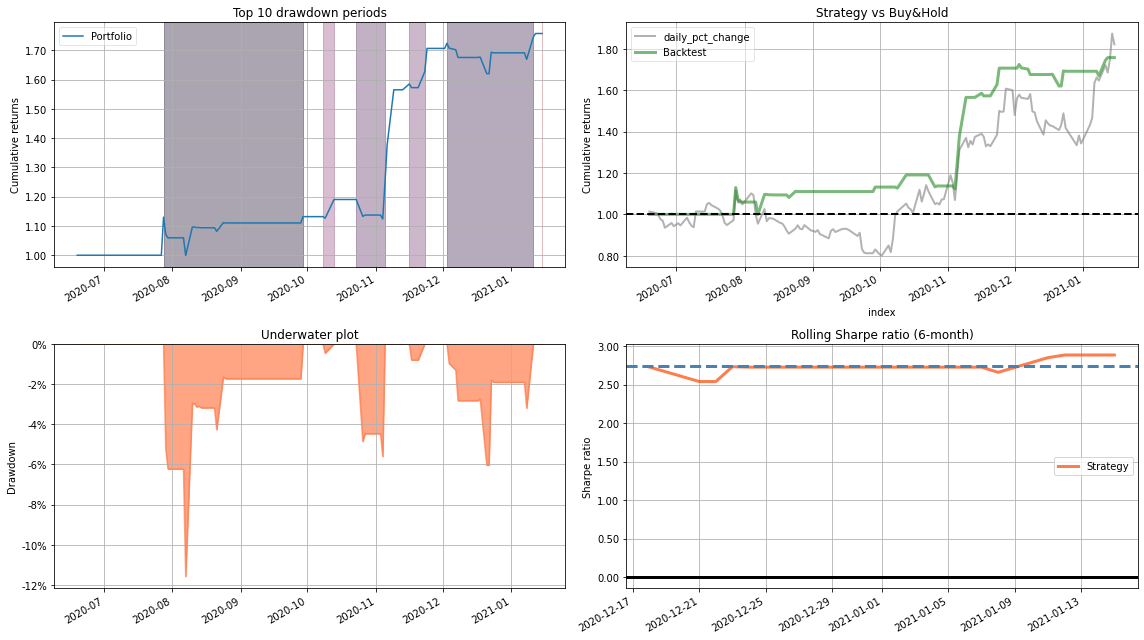

In [431]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs Buy&Hold')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("NLPstrat4951.png")
files.download("NLPstrat4951.png")

# Normal model with rolling returns, and rolling standard deviation as features

In [433]:
X = df[predictor_list]
y = df['actual_signal']
train_length = int(len(X)*0.88)
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()

X_train = X_train.append(X[:train_length])
X_test = X_test.append(X[train_length:])
y_train = y_train.append(y[:train_length])
y_test = y_test.append(y[train_length:])
##Log
##EN
##RF
model_log = LogisticRegression()
model_XG = XGBClassifier()

In [434]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1053, 20)
(144, 20)
(1053,)
(144,)


In [435]:
model_log.fit(X_train,y_train)
model_XG.fit(X_train, y_train)
print('Model Log' + ' ' + str(model_log.score(X_train, y_train)))
print('Model XGB' + ' ' + str(model_XG.score(X_train, y_train)))

Model Log 0.5716999050332384
Model XGB 0.8281101614434948


In [436]:
y_predict_standard = model_XG.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_standard)
print('Accuracy of the standard XGboost model %.5f%%' % (accuracy*100))

Accuracy of the standard XGboost model 45.83333%


In [437]:
print(classification_report(y_test, y_predict_standard))

              precision    recall  f1-score   support

          -1       0.55      0.20      0.29        81
           1       0.43      0.79      0.56        63

    accuracy                           0.46       144
   macro avg       0.49      0.50      0.43       144
weighted avg       0.50      0.46      0.41       144



In [438]:
y_predict_standard_log = model_log.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_standard_log)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 46.52778%


In [439]:
print(classification_report(y_test, y_predict_standard_log))

              precision    recall  f1-score   support

          -1       0.52      0.54      0.53        81
           1       0.38      0.37      0.37        63

    accuracy                           0.47       144
   macro avg       0.45      0.45      0.45       144
weighted avg       0.46      0.47      0.46       144



Changing hyperparameter tuning search: to 1,10,10

In [440]:
grid={"C":np.logspace(1,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.5051572327044025


In [441]:
y_predict_cv_log = logreg_cv.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_cv_log)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 47.22222%


a small improvement

In [442]:
print(classification_report(y_test, y_predict_cv_log))

              precision    recall  f1-score   support

          -1       0.53      0.54      0.54        81
           1       0.39      0.38      0.39        63

    accuracy                           0.47       144
   macro avg       0.46      0.46      0.46       144
weighted avg       0.47      0.47      0.47       144



Looking at the long calls:

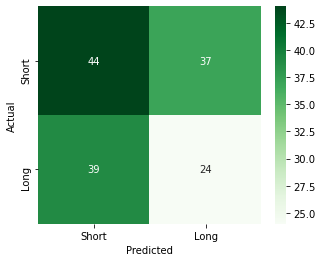

In [232]:
array = confusion_matrix(y_test, y_predict_cv_log)
dfduunk = pd.DataFrame(array, index=['Short', 'Long'], columns=[
'Short', 'Long'])
plt.figure(figsize=(5, 4))
sn.heatmap(dfduunk, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [443]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(50, 300, 50)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 14, 7)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 5, 5)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [444]:
xgb_base = XGBClassifier()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 50, cv = 3, verbose = 2, 
                                random_state = 42, n_jobs = -1)
eval_set = [(X_test, y_test)]
xgb_random.fit(X_train, y_train,early_stopping_rounds = 10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.1s


[0]	validation_0-error:0.479167	validation_0-logloss:0.692934
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.520833	validation_0-logloss:0.698403
[2]	validation_0-error:0.506944	validation_0-logloss:0.699216
[3]	validation_0-error:0.541667	validation_0-logloss:0.706423
[4]	validation_0-error:0.541667	validation_0-logloss:0.707587
[5]	validation_0-error:0.534722	validation_0-logloss:0.707737
[6]	validation_0-error:0.534722	validation_0-logloss:0.707597
[7]	validation_0-error:0.513889	validation_0-logloss:0.707367
[8]	validation_0-error:0.493056	validation_0-logloss:0.707523
[9]	validation_0-error:0.506944	validation_0-logloss:0.703854
[10]	validation_0-error:0.493056	validation_0-logloss:0.706242
Stopping. Best iteration:
[0]	validation_0-error:0.479167	validation_0-logloss:0.692934



[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                   

In [445]:
y_predict = xgb_random.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the XGboost after the hypertuning and prevention of overfitting %.5f%%' % (accuracy*100))

Accuracy of the XGboost after the hypertuning and prevention of overfitting 52.08333%


In [446]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.58      0.56      0.57        81
           1       0.45      0.48      0.47        63

    accuracy                           0.52       144
   macro avg       0.52      0.52      0.52       144
weighted avg       0.52      0.52      0.52       144



In [447]:
# Call the comparison function with the three final models
final_scores = final_comparison([logreg_cv,model_log, xgb_random,model_XG], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Hyper Log reg','Log Regr', 'Hyper XGb','XGb']

In [448]:
final_scores

,Hyper Log reg,Log Regr,Hyper XGb,XGb
Mean Absolute Error,1.055600,1.069400,0.958300,1.083300
Mean Squared Error,2.111100,2.138900,1.916700,2.166700
R^2,-1.144600,-1.172800,-0.947100,-1.201100
Accuracy,0.472222,0.465278,0.520833,0.458333


The XGboost model with hyper parameter tuning is performing the best, and i therefore use that in the investing strategy. 

## Data preprocessing for investing

In [449]:
prøve =  df[1053:]
prøve['predicted'] = xgb_random.predict_proba(X_test)[:, 1]

In [450]:
start2 = "2020-06-16"
end2 = "2021-01-13"

data1=yf.download(tickers, start=start2, end=end2)
data1.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume',
                         }, inplace=True)
predictions = prøve['predicted']
predictions = pd.DataFrame(predictions)
prices = predictions.join(data1,how='left').dropna()
prices

[*********************100%***********************]  1 of 1 completed


,predicted,open,high,low,Close,close,volume
Date,,,,,,,
2020-06-16,0.492514,23.430000,24.150000,22.940001,24.120001,24.120001,2277667.0
2020-06-17,0.532143,24.120001,24.320000,22.740000,22.910000,22.910000,1752198.0
2020-06-18,0.532143,22.770000,24.000000,22.660000,23.330000,23.330000,1382505.0
2020-06-19,0.472297,24.559999,24.559999,23.230000,23.639999,23.639999,4461467.0
2020-06-22,0.472297,23.450001,23.940001,23.250000,23.480000,23.480000,791750.0
...,...,...,...,...,...,...,...
2021-01-06,0.526724,38.000000,40.450001,37.310001,38.139999,38.139999,3821363.0
2021-01-07,0.526724,39.939999,41.070000,38.570000,38.770000,38.770000,2413122.0
2021-01-08,0.526724,38.910000,39.180000,37.270000,38.400002,38.400002,1409694.0


Initiating backtrader again

In [451]:
cerebro = bt.Cerebro(stdstats=False)

In [466]:
data = SignalData(dataname=prices)
# instantiate Cerebro, add strategy, data, initial cash, commission and pyfolio for performance analysis
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy)
cerebro.adddata(data, name="WEED.TO")
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.00)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [467]:
 #run the backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-06-17, BUY EXECUTED --- Price: 24.12, Cost: 99977.40,Commission: 0.00
2020-06-19, SELL EXECUTED --- Price: 24.56, Cost: 99977.40,Commission: 0.00
2020-06-19, OPERATION RESULT --- Gross: 1823.79, Net: 1823.79
2020-07-28, BUY EXECUTED --- Price: 23.04, Cost: 101813.76,Commission: 0.00
2020-08-27, SELL EXECUTED --- Price: 21.69, Cost: 101813.76,Commission: 0.00
2020-08-27, OPERATION RESULT --- Gross: -5965.65, Net: -5965.65
2020-09-23, BUY EXECUTED --- Price: 21.19, Cost: 95842.37,Commission: 0.00
2020-09-25, SELL EXECUTED --- Price: 18.86, Cost: 95842.37,Commission: 0.00
2020-09-25, OPERATION RESULT --- Gross: -10538.59, Net: -10538.59
2020-09-29, BUY EXECUTED --- Price: 19.01, Cost: 85316.88,Commission: 0.00
2020-10-01, SELL EXECUTED --- Price: 19.38, Cost: 85316.88,Commission: 0.00
2020-10-01, OPERATION RESULT --- Gross: 1660.56, Net: 1660.56
2020-10-02, BUY EXECUTED --- Price: 18.50, Cost: 86968.50,Commission: 0.00
2020-10-27, SELL EXECUTED ---

In [468]:
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
ROL_4852 = returns
returns.name = 'Strategy'
returns.head(2)

index
2020-06-16 00:00:00+00:00    0.000000
2020-06-17 00:00:00+00:00   -0.050155
Name: Strategy, dtype: float64

In [469]:
pf.show_perf_stats(returns)

Start date,2020-06-16
End date,2021-01-12
Total months,6
,Backtest
Annual return,169.826%
Cumulative returns,75.64%
Annual volatility,57.727%
Sharpe ratio,2.00
Calmar ratio,6.57
Stability,0.63
Max drawdown,-25.833%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

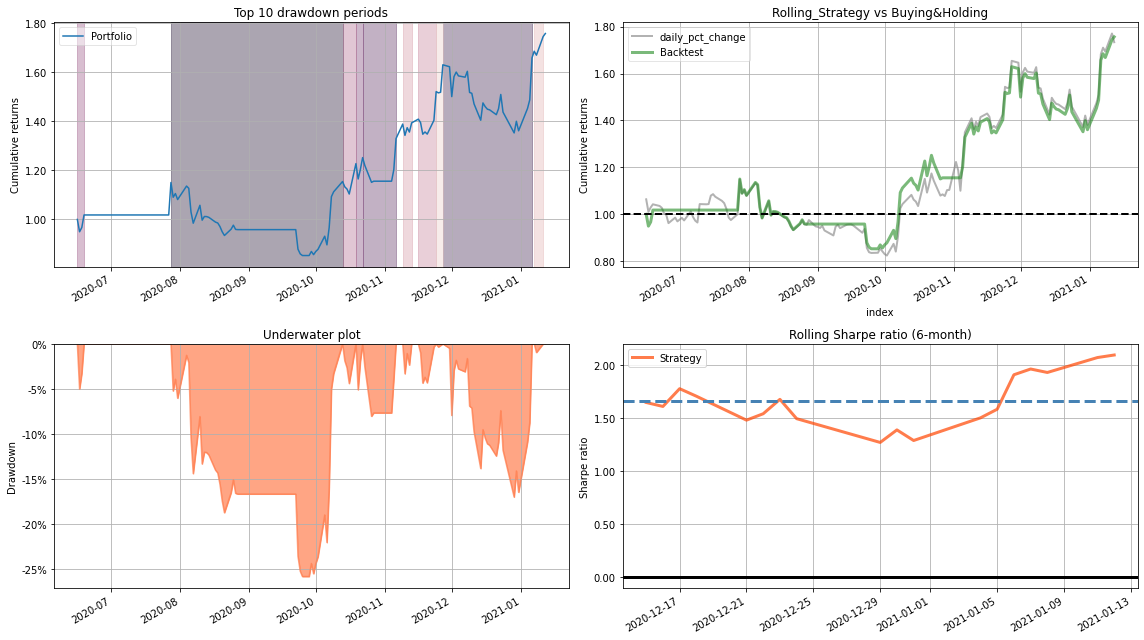

In [470]:
# plot performance for strategy vs Buying&Holding
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Rolling_Strategy vs Buying&Holding')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("rolling4852.png")
files.download("rolling4852.png")

# Joint model

Removing return next day and actual signal :df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [177]:
df_for_ensemble = df.iloc[:,7:]
df_for_ensemble.drop(['return_next_day','actual_signal'], axis=1, inplace=True)
df_for_ensemble

,pct_change_10,std_10,pct_change_15,std_15,pct_change_20,std_20,pct_change_25,std_25,pct_change_30,std_30,pct_change_35,std_35,pct_change_40,std_40,pct_change_45,std_45,pct_change_50,std_50,pct_change_55,std_55
Date,,,,,,,,,,,,,,,,,,,,
2016-04-06,-0.058941,0.021861,-0.058069,0.020994,-0.125779,0.018735,-0.159484,0.017429,-0.212343,0.020238,-0.078830,0.026325,0.010061,0.026932,-0.046433,0.026099,-0.042631,0.024800,-0.049564,0.024010
2016-04-07,-0.022942,0.014441,-0.051809,0.020580,-0.135125,0.018959,-0.179247,0.017576,-0.171788,0.017762,-0.098593,0.026486,-0.033324,0.026840,-0.051326,0.026168,-0.054932,0.024927,-0.076734,0.024115
2016-04-08,-0.062693,0.011732,-0.094656,0.019006,-0.144237,0.019074,-0.175242,0.017470,-0.157512,0.017263,-0.125552,0.026470,-0.053299,0.026937,-0.067455,0.026262,-0.067301,0.025016,-0.081834,0.024163
2016-04-11,-0.038355,0.014491,-0.089034,0.019503,-0.113144,0.020027,-0.165024,0.018003,-0.147473,0.017670,-0.087203,0.026655,-0.017482,0.027055,-0.050737,0.026456,-0.054357,0.025176,-0.061342,0.024343
2016-04-12,-0.022911,0.013928,-0.078045,0.019506,-0.095287,0.019852,-0.158244,0.018051,-0.164715,0.017199,-0.152658,0.023901,-0.075848,0.025320,-0.043218,0.026438,-0.058102,0.025167,-0.079929,0.024193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,0.179841,0.052499,0.197197,0.044964,0.082730,0.043843,0.060623,0.043554,0.210972,0.044169,0.209097,0.041966,0.224739,0.040051,0.381340,0.045669,0.511731,0.045627,0.452297,0.045675
2021-01-08,0.153240,0.053220,0.137514,0.044089,0.058052,0.043864,0.126106,0.040569,0.118146,0.041833,0.209427,0.041963,0.248372,0.039636,0.401368,0.045387,0.497286,0.045707,0.493711,0.045018
2021-01-11,0.158720,0.053527,0.193142,0.044668,0.157038,0.042714,0.117247,0.040158,0.166888,0.042479,0.288706,0.041882,0.270376,0.040030,0.519516,0.043944,0.549102,0.045914,0.505515,0.045165


In [178]:
dfE_reind=df_for_ensemble.reset_index(level=['Date'])
dffE = dfE_reind.rename(columns = {'Date': 'date'}, inplace = False)
spmi_reind = spmi.reset_index(level='date')


In [179]:
ensemble_merge = pd.merge(spmi_reind[:-2], dffE, how='left', on='date')

In [180]:
ensemble_merge = ensemble_merge.set_index('date')

In [181]:
ensemble_merge.drop(['return_next_day','actual_signal'], axis=1, inplace=True)

## Storing the predictor variables in "ensemble_merge"

In [182]:
ensemble_merge

,positives,negatives,ratio,positives (t-1),negatives (t-1),ratio (t-1),positives (t-2),negatives (t-2),ratio (t-2),positives (t-3),negatives (t-3),ratio (t-3),positives (t-4),negatives (t-4),ratio (t-4),positives (t-5),negatives (t-5),ratio (t-5),positives (t-6),negatives (t-6),ratio (t-6),positives (t-7),negatives (t-7),ratio (t-7),positives (t-8),negatives (t-8),ratio (t-8),positives (t-9),negatives (t-9),ratio (t-9),positives (t-10),negatives (t-10),ratio (t-10),Open,High,Low,Close,Adj Close,Volume,daily_pct_change,pct_change_10,std_10,pct_change_15,std_15,pct_change_20,std_20,pct_change_25,std_25,pct_change_30,std_30,pct_change_35,std_35,pct_change_40,std_40,pct_change_45,std_45,pct_change_50,std_50,pct_change_55,std_55
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-03,1.0,0.0,1.000000,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.000000,0.0,2.0,0.0000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,59.799999,63.320000,58.980000,63.320000,63.320000,3179126,0.081469,0.009255,0.050753,-0.017740,0.062949,-0.048776,0.054962,0.168329,0.060319,0.281931,0.058864,0.779394,0.077618,0.722687,0.075524,0.732000,0.071546,0.738856,0.068143,0.672514,0.066640
2018-10-04,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,63.880001,64.629997,61.340000,62.480000,62.480000,3414346,-0.013266,-0.068776,0.045583,0.105172,0.050983,-0.033562,0.054687,0.085832,0.059000,0.232056,0.058773,0.453531,0.059104,0.664179,0.075551,0.708431,0.071676,0.743955,0.068096,0.699248,0.066349
2018-10-05,0.0,1.0,0.000000,2.0,0.0,1.000000,2.0,0.0,1.000000,0.0,2.0,0.000000,2.0,2.0,0.5000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,62.490002,63.849998,60.139999,61.490002,61.490002,2558957,-0.015845,-0.038595,0.043661,0.015305,0.047722,-0.067748,0.054562,0.104954,0.058604,0.173984,0.058554,0.473705,0.058710,0.608122,0.075622,0.714730,0.071607,0.722679,0.068223,0.678231,0.066454
2018-10-09,2.0,0.0,1.000000,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.3125,3.0,21.0,0.125000,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,65.000000,65.139999,62.599998,63.090000,63.090000,2895761,0.026020,-0.066716,0.040285,0.013529,0.047653,-0.054718,0.054845,0.096994,0.058457,0.120446,0.057024,0.413688,0.057391,0.640854,0.075555,0.715721,0.071610,0.764606,0.068099,0.740558,0.066140
2018-10-10,0.0,2.0,0.000000,2.0,2.0,0.500000,2.0,0.0,1.000000,5.0,11.0,0.312500,3.0,21.0,0.1250,3.0,24.0,0.111111,3.0,7.0,0.300000,2.0,7.0,0.222222,3.0,8.0,0.272727,7.0,8.0,0.466667,2.0,5.0,0.285714,62.860001,64.989998,60.549999,62.759998,62.759998,3386947,-0.005231,-0.076362,0.040106,-0.056544,0.044251,-0.035029,0.054602,-0.062328,0.049378,0.091674,0.056926,0.298906,0.054866,0.688596,0.074811,0.726478,0.071519,0.736197,0.068151,0.790504,0.065520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,39.939999,41.070000,38.570000,38.770000,38.770000,2413122,0.016518,0.179841,0.052499,0.197197,0.044964,0.082730,0.043843,0.060623,0.043554,0.210972,0.044169,0.209097,0.041966,0.224739,0.040051,0.381340,0.045669,0.511731,0.045627,0.452297,0.045675
2021-01-08,2.0,1.0,0.666667,1.0,0.0,1.000000,2.0,4.0,0.333333,1.0,2.0,0.333333,0.0,1.0,0.0000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,38.910000,39.180000,37.270000,38.400002,38.400002,1409694,-0.009543,0.153240

In [495]:

X = ensemble_merge
y = spmi.actual_signal[:-2]
print(X.shape)
print(y.shape)

(571, 60)
(571,)


In [504]:
train_length = int(len(X)*0.75)

X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()


X_train = X_train.append(X[:train_length])
X_test = X_test.append(X[train_length:])
y_train = y_train.append(y[:train_length])
y_test = y_test.append(y[train_length:])
##Log
##EN
##RF
model_log = LogisticRegression()
model_XG = XGBClassifier()

In [505]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(428, 60)
(143, 60)
(428,)
(143,)


In [272]:
model_log.fit(X_train,y_train)
model_XG.fit(X_train, y_train)
print('Model Log' + ' ' + str(model_log.score(X_train, y_train)))
print('Model XGB' + ' ' + str(model_XG.score(X_train, y_train)))

Model Log 0.6635514018691588
Model XGB 0.9672897196261683


In [273]:
y_predict_XG_standard = model_XG.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_XG_standard)
print('Accuracy of the XG boost model is is %.5f%%' % (accuracy*100))

Accuracy of the XG boost model is is 49.65035%


In [274]:
print(classification_report(y_test, y_predict_XG_standard))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52        81
           1       0.43      0.52      0.47        62

    accuracy                           0.50       143
   macro avg       0.50      0.50      0.50       143
weighted avg       0.51      0.50      0.50       143



xgb_model (Optional[Union[xgboost.core.Booster, str, xgboost.sklearn.XGBModel]]) – file name of stored XGBoost model or ‘Booster’ instance XGBoost model to be loaded before training (allows training continuation)

In [275]:
y_predict_log_standard = model_log.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_log_standard)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 48.25175%


In [276]:
print(classification_report(y_test, y_predict_log_standard))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52        81
           1       0.41      0.47      0.44        62

    accuracy                           0.48       143
   macro avg       0.48      0.48      0.48       143
weighted avg       0.49      0.48      0.48       143



In [277]:
grid={"C":np.logspace(1,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.5327242524916944


In [278]:
y_predict_cv_log = logreg_cv.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_cv_log)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 46.85315%


The hyperparameter tuning, and crossvalitdation did not help with improving the log reg model.

In [279]:
print(classification_report(y_test, y_predict_cv_log))

              precision    recall  f1-score   support

           0       0.53      0.48      0.51        81
           1       0.40      0.45      0.42        62

    accuracy                           0.47       143
   macro avg       0.47      0.47      0.47       143
weighted avg       0.48      0.47      0.47       143



# XGBOOST hyperparamet tuning

In [280]:
xgb_base = XGBClassifier()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 50, cv = 3, verbose = 2, 
                                random_state = 42, n_jobs = -1)
eval_set = [(X_test, y_test)]
xgb_random.fit(X_train, y_train,early_stopping_rounds = 10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[0]	validation_0-error:0.461538	validation_0-logloss:0.693508
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.433566	validation_0-logloss:0.688215
[2]	validation_0-error:0.475524	validation_0-logloss:0.693203
[3]	validation_0-error:0.461538	validation_0-logloss:0.698301
[4]	validation_0-error:0.447552	validation_0-logloss:0.700373
[5]	validation_0-error:0.468531	validation_0-logloss:0.700705
[6]	validation_0-error:0.48951	validation_0-logloss:0.713709
[7]	validation_0-error:0.461538	validation_0-logloss:0.719686
[8]	validation_0-error:0.48951	validation_0-logloss:0.730313
[9]	validation_0-error:0.503497	validation_0-logloss:0.73981
[10]	validation_0-error:0.48951	validation_0-logloss:0.748856
[11]	validation_0-error:0.496504	validation_0-logloss:0.754492
Stopping. Best iteration:
[1]	validation_0-error:0.433566	validation_0-logloss:0.688215



[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                   

In [281]:
y_predict_XG_Hyper = xgb_random.predict(X_test)
accuracy = accuracy_score(y_test,y_predict_XG_Hyper)
print('Accuracy of the logistic regression is %.5f%%' % (accuracy*100))

Accuracy of the logistic regression is 56.64336%


In [282]:
print(classification_report(y_test, y_predict_XG_Hyper))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62        81
           1       0.50      0.48      0.49        62

    accuracy                           0.57       143
   macro avg       0.56      0.56      0.56       143
weighted avg       0.56      0.57      0.57       143



In [283]:
# Call the comparison function with the three final models
final_scores = final_comparison([logreg_cv,model_log, xgb_random,model_XG], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Hyper Log reg','Log REG', 'Hyper XGb','XGb']
final_scores

,Hyper Log reg,Log REG,Hyper XGb,XGb
Mean Absolute Error,0.531500,0.517500,0.433600,0.503500
Mean Squared Error,0.531500,0.517500,0.433600,0.503500
R^2,-1.164100,-1.107100,-0.765400,-1.050200
Accuracy,0.468531,0.482517,0.566434,0.496503


# Hyperparameter tuned and crossvalidated Extreme gradient boost model, is best at predicting whether the next day has a positive or negative return, in all 3 models. 

# investing data pre...

In [284]:
hmm2 = spmi[430:]
hmm2['pred_signal']=xgb_random.predict_proba(X_test)[:,1]

In [285]:
Tradedata2 = hmm2.iloc[:,33:]


In [286]:
Tradedata2.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume','pred_signal':'predicted'
                         }, inplace=True)

In [214]:
Tradedata2.head()

,open,high,low,Close,close,volume,daily_pct_change,return_next_day,actual_signal,predicted
date,,,,,,,,,,
2020-06-19,24.559999,24.559999,23.230000,23.639999,23.639999,4461467,0.013288,-0.006768,0,0.545844
2020-06-22,23.450001,23.940001,23.250000,23.480000,23.480000,791750,-0.006768,-0.007666,0,0.483101
2020-06-23,23.690001,25.180000,23.270000,23.299999,23.299999,3333527,-0.007666,-0.022747,0,0.379968
2020-06-24,23.150000,23.500000,22.420000,22.770000,22.770000,1440619,-0.022747,-0.006588,0,0.394166
2020-06-25,22.500000,22.790001,22.209999,22.620001,22.620001,1012985,-0.006588,-0.035367,0,0.540432


In [296]:
cerebro = bt.Cerebro(stdstats=False)

In [297]:
data1=yf.download(tickers, start=start, end=end)
data1.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume',
                         }, inplace=True)
predictions = Tradedata2['predicted']
predictions = pd.DataFrame(predictions)
prices = predictions.join(data1,how='left').dropna()
data = SignalData(dataname=prices)

[*********************100%***********************]  1 of 1 completed


In [307]:
# instantiate Cerebro, add strategy, data, initial cash, commission and pyfolio for performance analysis
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy)
cerebro.adddata(data, name="WEED.TO")
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.00)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [308]:
 #run the backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-06-26, BUY EXECUTED --- Price: 22.55, Cost: 99986.70,Commission: 0.00
2020-06-29, SELL EXECUTED --- Price: 21.61, Cost: 99986.70,Commission: 0.00
2020-06-29, OPERATION RESULT --- Gross: -4167.95, Net: -4167.95
2020-07-03, BUY EXECUTED --- Price: 22.23, Cost: 95811.30,Commission: 0.00
2020-07-06, SELL EXECUTED --- Price: 22.23, Cost: 95811.30,Commission: 0.00
2020-07-06, OPERATION RESULT --- Gross: 0.00, Net: 0.00
2020-07-15, BUY EXECUTED --- Price: 23.75, Cost: 95831.25,Commission: 0.00
2020-07-22, SELL EXECUTED --- Price: 23.83, Cost: 95831.25,Commission: 0.00
2020-07-22, OPERATION RESULT --- Gross: 322.80, Net: 322.80
2020-07-23, BUY EXECUTED --- Price: 23.14, Cost: 96146.70,Commission: 0.00
2020-07-29, SELL EXECUTED --- Price: 25.75, Cost: 96146.70,Commission: 0.00
2020-07-29, OPERATION RESULT --- Gross: 10844.55, Net: 10844.55
2020-08-06, BUY EXECUTED --- Price: 25.27, Cost: 106993.18,Commission: 0.00
2020-08-07, SELL EXECUTED --- Price: 23.

In [310]:
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2020-06-19 00:00:00+00:00    0.0
2020-06-22 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [311]:
returns.dropna(inplace=True)
returns=returns[1:]
merged_ret_4852 = returns
pf.show_perf_stats(returns)

Start date,2020-06-22
End date,2021-01-15
Total months,6
,Backtest
Annual return,189.842%
Cumulative returns,82.148%
Annual volatility,48.843%
Sharpe ratio,2.42
Calmar ratio,13.38
Stability,0.67
Max drawdown,-14.19%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

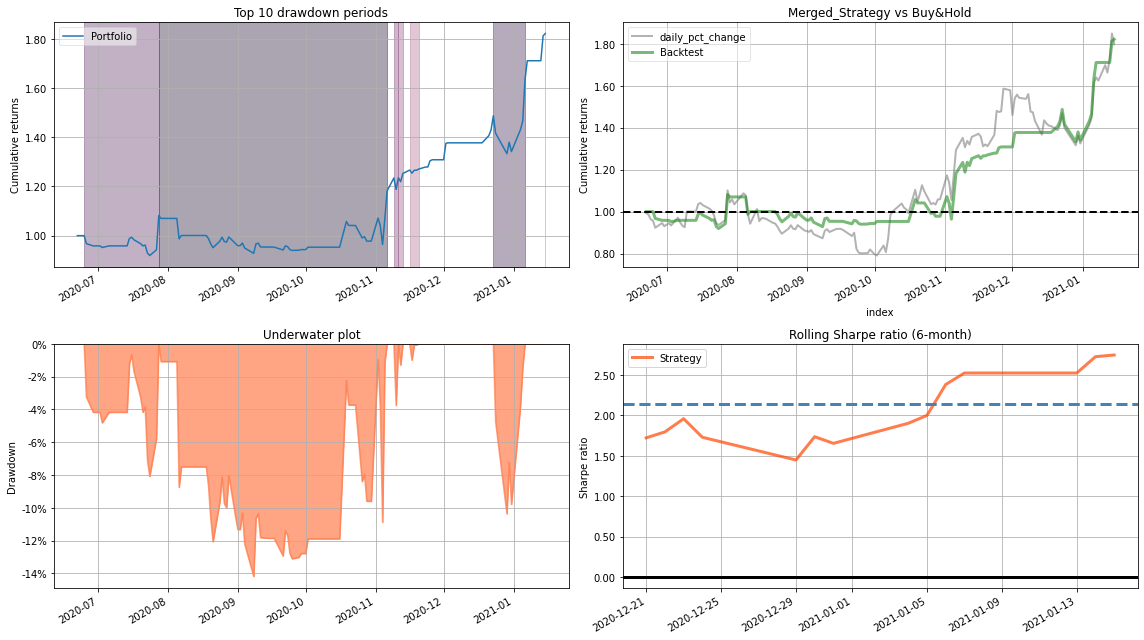

In [312]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Merged_Strategy vs Buy&Hold')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()
from google.colab import files
plt.savefig("Merged-4852.png")
files.download("Merged-4852.png")

# Plotting the 48/52 strategies.